# Data Mining Course Spark Exercise
## Sharif University of Technology

In this notebook we are going to analyze farsi news. 
Outline of the exercise:
* Dataset preparation
* Preprocessing 
* Exploration 
* Word Collections

You should replace the `TODO` parts with your implementation. Remeber that each `TODO` may take multiple lines and you shouldn't limit your self to one-line codes.

## Prerequisites
You should be faimilar with [tf-idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf). In this notebook you should use the following formula for tf-idf:
$$f_{t,d}/len(d) \times log(1 + \frac{N}{n_t})$$

## Warning: RDD api only
You **can not** use Dataframe, Dataset, mllib, ml, ... apis of spark in this exercise. You should only use the [RDD api](http://spark.apache.org/docs/2.1.0/api/python/pyspark.html#pyspark.RDD).

# Please enter your name below:
# Name: Ilia Hashemi Rad
# Student Number: 99102456

# Section 1: Dataset prepartition
This section you need to download [dataset](https://drive.google.com/file/d/1bRxHQDzPr6wDimbM7b89H47kH8O3YV8Y/view?usp=sharing) in a directory you work. After that run the below cell to untar the datase.

**Note 1: Don't change the below command.**

**Note 2: If you use Windows OS, unzip the dataset manually.**

## Install Pypark & Initialization
Uncomment this section if you use google colab or local pc

In [1]:
#! pip install pyspark

In [2]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("HW1") \
    .master("local[*]") \
    .getOrCreate()

sc=spark.sparkContext

# Reading the data

In [3]:
news_rdd = sc.textFile("news_data.jsonl")
news_rdd.takeSample(False, 1, 12)

['{"body": "نشست بزرگداشت روز جهانی حافظ شیرازی 20 مهرماه در دانشگاه پکن برگزار می شود.\\n\\n- ایرنا نوشت: با همکاری مشترک گروه زبان و ادبیات فارسی دانشگاه پکن و رایزنی فرهنگی جمهوری اسلامی ایران در چین، نشست بزرگداشت روز جهانی حافظ شیرازی روز پنجشنبه 20 مهرماه ساعت 10:30 تا 12 در دانشگاه پکن برگزار می شود.\\n\\nدر این نشست، محسن بختیار، سفیر و نعمت الله ایران زاده، رایزن فرهنگی جمهوری اسلامی ایران در چین، پروفسور چن مینْگ، رییس محترم دانشکده زبان های خارجی دانشگاه پکن، بهادر باقری، استاد مدعو زبان و ادبیات فارسی دانشکده زبان های خارجی دانشگاه پکن، سخنرانی می کنند.\\n\\nخانم وانگ یی دان، استاد رشته زبان و ادبیات فارسی دانشگاه پکن، شی گوانگ، استاد رشته زبان و ادبیات فارسی و مدیر مرکز پژوهش های فرهنگ ایران در دانشگاه پکن و لیو یینگ جون، استاد و مدیر گروه زبان و ادبیات فارسی دانشگاه پکن از دیگر سخنرانان این نشست هستند.", "image_title_url": "https://ettelaat.com/files/fa/news/1402/7/20/82679_282.jpg", "language": "fa", "source": "موتور جستجوی قطره", "title": "ادای احترام چینی ها به حافظ +ع

# Section 2: Preprocessing
This section we try to normalize news and remove useless characters (for example /n and /u200c and ...). Also find and remove stop words.

In [4]:
# import neccesary packages here
import json
import re

In [5]:
# Parse the JSON lines and extract the body text
parsed_news_rdd = news_rdd.map(lambda line: json.loads(line)['body'])

# Define a function to remove useless characters including '\n', '\u200c', and '\\n'
def remove_useless_characters(text):
    # Remove special characters, digits, and unwanted unicode characters
    text = re.sub(r'\\|\\n|\\u200c|\n', '', text)

    # Remove non-Persian characters and digits
    text = re.sub(r'[^آ-ی\s]', ' ', text)

    # Define a regular expression pattern that matches one or more spaces
    pattern = re.compile(r" +")
    # Apply the pattern to the text and replace the matches with a single space
    text = pattern.sub(" ", text)
    return text

# Define a list of Farsi stop words
def load_stop_words(file_paths):
    stop_words_set = set()
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            stop_words_set.update(file.read().splitlines())
    return stop_words_set

# List of paths to your stop words files
stop_words_files = ['verbal.txt', 'persian.txt', 'short.txt', 'chars.txt', 'nonverbal.txt']

# Load stop words from files
stop_words = load_stop_words(stop_words_files)

# Remove useless characters
clean_news_rdd = parsed_news_rdd.map(remove_useless_characters)

# Remove the stop words from clean_news_rdd without splitting the text
clean_news_rdd = clean_news_rdd.map(lambda x: " ".join([w for w in x.split() if w not in stop_words]))

# Process the cleaned news RDD by splitting
processed_news_rdd = clean_news_rdd.flatMap(lambda text: text.split()) \
                                   .filter(lambda word: word not in stop_words)

# Take a random sample from the cleaned news RDD
sample_clean_news = clean_news_rdd.takeSample(False, 1)

# Print the sample news
print('One sample of cleaned_news_rdd is:')
print(sample_clean_news)

print()

# Take 10 random samples from the processeded news RDD
sample_processed_news = processed_news_rdd.takeSample(False, 10)

# Print the sample news
print('Ten samples of cleaned_news_rdd is:')
print(sample_processed_news)

One sample of cleaned_news_rdd is:
['شماره مجله نامه جمهور ویژهنامهای برنامه هفتم توسعه نقدنامهای باب نابرنامه هفتم توسعه ضدعدالت ضدتوسعه ضد جامعه سه فصل منتشر گزارش خبرگزاری مهر شماره مجله نامه جمهور ویژهنامهای برنامه هفتم توسعه تیتر نقدنامهنامهای باب نا برنامه هفتم توسعه ضد عدالت ضد توسعه ضد جامعه سه فصل منتشر بررسی نقد متن فرامتن برنامه هفتم توسعه منظر اجتماعی میپردازد سرمقاله شماره قلم سردبیر مجله مجتبی نامخواه پرسش آغاز زمانهای سمت جامعه سمت رهبری انقلاب مطالبهای فراگیر پر شکافهای طبقاتی بهنفع سندِ نامقبولی ضد عدالت اجتماعی تدوین مقدمه متن میانه سوتفاهمی میبریم میتوان آشکارترین تفوق رشد اقتصادی عدالت اجتماعی تئوریزه مسئولیت ناپذیرترین برنامههای توسعه باب سیاستهای اجتماعی حمایتی نوشت سرمقاله ادامه سه مبحث مجزا بررسی برنامه هفتم توسعه میپردازد مبحث سه تضاد اساسی موجود متن لایحه برنامه پرداخته وجوه ضد عدالت ضد توسعه ضد جامعه موجود بررسی عناوین ضد عدالت تفوق رشد اقتصادی عدالت اجتماعی بندهای ضد عدالت اجتماعی بیتوجهی مسئله نابرابری نابرنامه جاده صاف کاتالاکسی بررسی وجوه ضد توسعه برنامه 

Ten samples of cleaned_news_rdd is:
['افتاده', 'صحبتهایی', 'مهران', 'بیان', 'اخراج', 'پرده', 'ارزش', 'مدیرعامل', 'تحمیلی', 'رسانهای']


# Section 3: Exploration
Please answer the following questions regarding the dataset:
- what are the titles and urls of 5 longest news?
- what are the 20 most frequent words? (Plot the distribution of these words)
- find the `word clouds` of the news.
    - you need to use `keywords` field.
    - score = $2^{log_{10}(count)}$ ( count is the number of the each keyword)
    - you should normalize scores.
    - use ***wordcloud*** package for showing the result.
- plot a timeline which shows total count of news per each day.
- plot a timeline which shows total count of news per each day that have at least one of the word clouds.
- what is your inference about the below timeline.

### Title and URLs of 5 longest news

In [6]:
# Parse the JSON lines to extract the title, url, and body length
titles_urls_length_rdd = news_rdd.map(lambda line: json.loads(line)) \
                                 .map(lambda news: (news['title'], news['url'], len(news['body'])))

# Get the top 5 longest news by body length
top_5_longest_news = titles_urls_length_rdd.takeOrdered(5, key=lambda x: -x[2])

# Print the titles and urls of the 5 longest news
for title, url, length in top_5_longest_news:
    print(f"Title: {title}, URL: {url}, Length: {length}")


Title: ششمین روز محاکمه دژخیم حمید نوری در دادگاه دورس آلبانی - ادای شهادت حسین فارسی - چهار‌شنبه ۲۶آبان , URL: https://news.mojahedin.org/id/978bfe13-a530-4421-8958-c66f58f17d34, Length: 39432
Title: اعتراف های سینمایی رضا میرکریمی به شهرام مکری و مرتضی فرشباف, URL: https://www.isna.ir/news/1402061810772/اعتراف-های-سینمایی-رضا-میرکریمی-به-شهرام-مکری-و-مرتضی-فرشباف, Length: 38156
Title: هرچه باید درباره نهم ربیع‌الاول بدانید+منابع دقیق و معتبر, URL: https://www.borna.news/بخش-%D9%82%D8%B1%D8%A2%D9%86-%D9%85%D8%B9%D8%A7%D8%B1%D9%81-53/920622-%D9%87%D8%B1%DA%86%D9%87-%D8%A8%D8%A7%DB%8C%D8%AF-%D8%AF%D8%B1%D8%A8%D8%A7%D8%B1%D9%87-%D9%86%D9%87%D9%85-%D8%B1%D8%A8%DB%8C%D8%B9-%D8%A7%D9%84%D8%A7%D9%88%D9%84-%D8%A8%D8%AF%D8%A7%D9%86%DB%8C%D8%AF-%D9%85%D9%86%D8%A7%D8%A8%D8%B9-%D8%AF%D9%82%DB%8C%D9%82-%D9%85%D8%B9%D8%AA%D8%A8%D8%B1, Length: 37912
Title: سردار نیلفروشان: نسل جدید موشک‌های هایپرسونیک در دست طراحی است, URL: https://www.iscanews.ir/news/1197445/سردار-نیلفروشان-نسل-جدید-موشک-های-هایپر

### 20 most frequent words

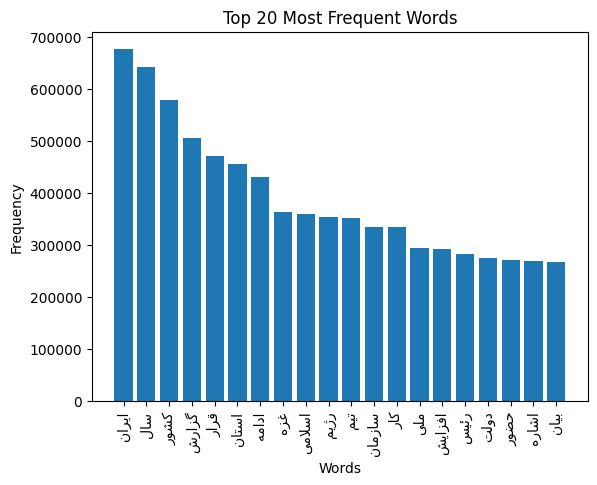

In [7]:
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
from arabic_reshaper import reshape

# Determining the RDD which contains the frequency of words
word_counts_rdd = processed_news_rdd.map(lambda word: (word, 1)) \
                                    .reduceByKey(lambda a, b: a + b)

# Get the top 20 most frequent words
top_20_words = word_counts_rdd.takeOrdered(20, key=lambda x: -x[1])

# Plot the distribution of these words
words, counts = zip(*top_20_words)
persian_words = [get_display(reshape(word)) for word in words]

plt.bar(persian_words, counts)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()


### The WordCloud Of News

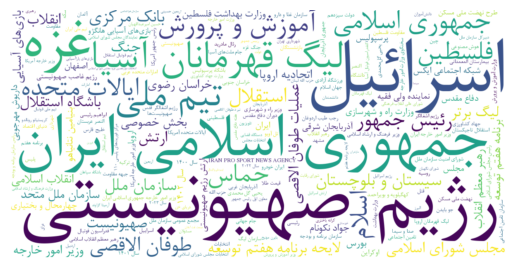

In [8]:
from wordcloud import WordCloud
import math

# Extract keywords and their counts, checking for the existence of the 'keywords' key (keyword fields that are empty are ignored)
keywords_rdd = news_rdd.flatMap(lambda line: json.loads(line).get('keywords', [])) \
                       .map(lambda keyword: (keyword, 1)) \
                       .reduceByKey(lambda a, b: a + b)

# Calculate scores for word clouds
word_cloud_scores_rdd = keywords_rdd.map(lambda x: (x[0], 2 ** (math.log10(x[1]))))

# Normalize scores
max_score = word_cloud_scores_rdd.max(key=lambda x: x[1])[1]
word_cloud_scores_normalized_rdd = word_cloud_scores_rdd.map(lambda x: (x[0], x[1] / max_score))

# Collect keywords and their normalized scores
word_cloud_data = word_cloud_scores_normalized_rdd.collect()

font_path = '/usr/share/fonts/truetype/farsifonts-0.4/nazli.ttf'

# Create a WordCloud object with specified parameters
wordcloud = WordCloud(width=1200, height=600, background_color='white', font_path=font_path)

# Generate the word cloud from the collected data
wordcloud.generate_from_frequencies(dict(word_cloud_data))

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Total Count Of News Per Day

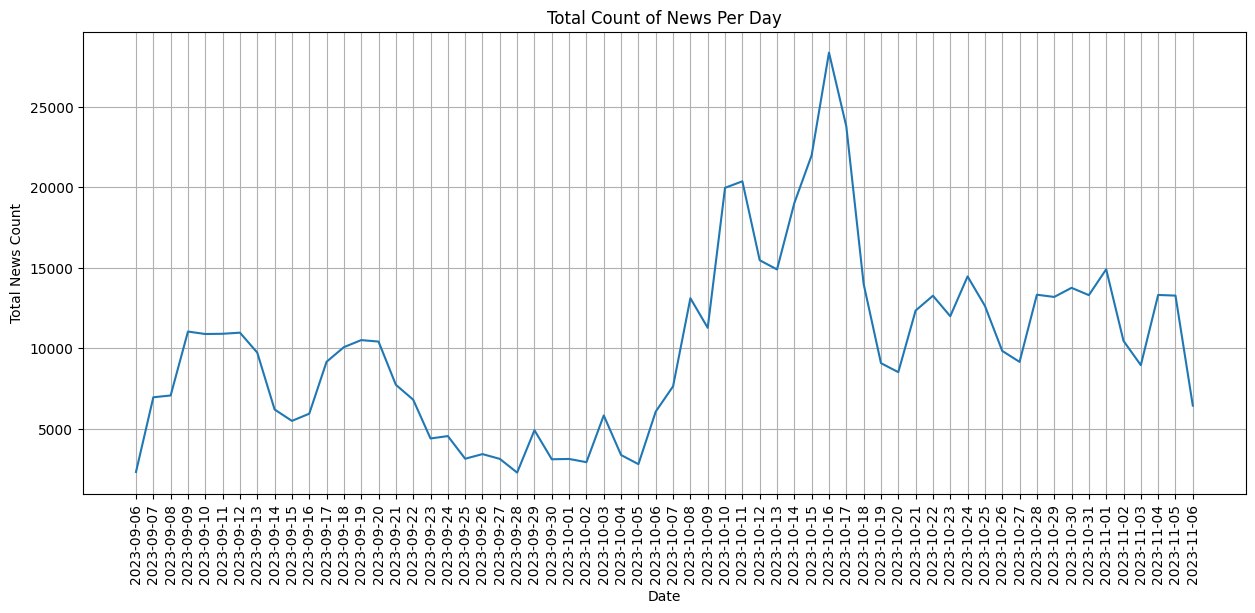

In [9]:
import time

# Convert Unix timestamp to human-readable date and count news per day
news_per_day_rdd = news_rdd.map(lambda line: json.loads(line)) \
                           .map(lambda news: (time.strftime('%Y-%m-%d', time.localtime(int(news['date_published']))), 1)) \
                           .reduceByKey(lambda a, b: a + b)

# Collect the data and sort by date
news_per_day = sorted(news_per_day_rdd.collect())

# Plot the timeline
dates, counts = zip(*news_per_day)
plt.figure(figsize=(15,6))
plt.plot(dates, counts)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total News Count')
plt.title('Total Count of News Per Day')
plt.grid()
plt.show()

### Total Count Of News (which have at least one of the 20 word clouds) Per day

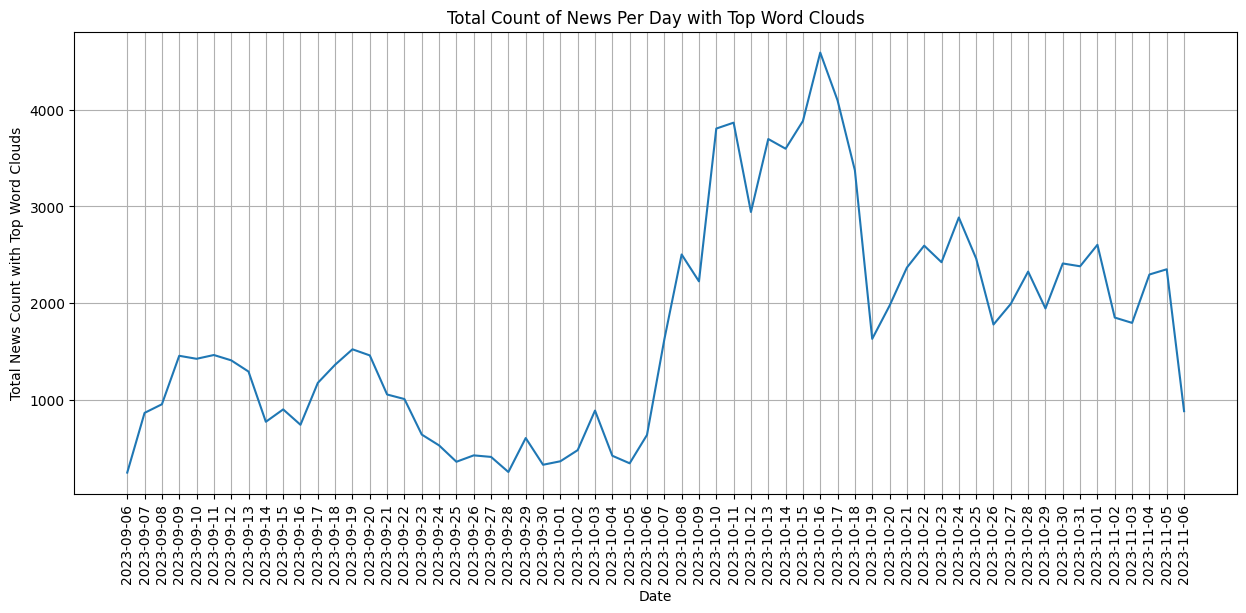

In [10]:
# Get the top 20 highest score keywords
top_20_keywords = sorted(word_cloud_data, key=lambda x: x[1], reverse=True)[:20]

# Broadcast the set of top 20 word cloud keywords to all workers
top_20_keywords_broadcast = sc.broadcast(set([keyword for keyword, _ in top_20_keywords]))

# Convert Unix timestamp to human-readable date and filter news with top 20 word clouds
news_with_top_word_clouds_per_day_rdd = news_rdd.map(lambda line: json.loads(line)) \
    .filter(lambda news: top_20_keywords_broadcast.value.intersection(news.get('keywords', []))) \
    .map(lambda news: (time.strftime('%Y-%m-%d', time.localtime(int(news['date_published']))), 1)) \
    .reduceByKey(lambda a, b: a + b)

# Collect the data and sort by date
news_with_top_word_clouds_per_day = sorted(news_with_top_word_clouds_per_day_rdd.collect())

# Plot the timeline
dates_with_top_word_clouds, counts_with_top_word_clouds = zip(*news_with_top_word_clouds_per_day)
plt.figure(figsize=(15,6))
plt.plot(dates_with_top_word_clouds, counts_with_top_word_clouds)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Total News Count with Top Word Clouds')
plt.title('Total Count of News Per Day with Top Word Clouds')
plt.grid()
plt.show()

# Section 4: Son, A-prior algorithm
- In this section we want to find 3-sets words collections that appear together the most.
    - What is your idea to solve the problem?
    - Implement an algorithm for doing so.
    - What is the most pertinant 3-sets words?
- Now we want to test the results and know that how valid is the model.
    - How we can test the model?
    - Explain and implement a scenario to test the model with using `tf-idf`.

### The Most Frequent 3-words Sequences

In [12]:
from nltk import ngrams

# A function to apply Apriori on a partition of the RDD
def apriori(iterator, min_support, n):
    # A dictionary to store the counts of each n-gram
    counts = {}
    # A set to store the frequent n-grams
    frequent = set()
    # Iterate over each text in the partition
    for text in iterator:
        # Generate all n-grams from the text
        ngram_list = ngrams(text.split(), n)
        # Increment the count of each n-gram
        for ng in ngram_list:
            counts[ng] = counts.get(ng, 0) + 1
    # Filter out the n-grams that have at least min_support
    for ng, count in counts.items():
        if count >= min_support:
            frequent.add(ng)
    # Return the frequent n-grams as an iterator
    return iter(frequent)

# A function to apply the SON algorithm on the RDD
def son(rdd, min_support, n):
    # Get the number of partitions of the RDD
    num_partitions = rdd.getNumPartitions()
    # Apply Apriori on each partition with a lower support threshold
    candidates = rdd.mapPartitions(lambda x: apriori(x, min_support / num_partitions, n)).distinct()
    # Count the occurrences of each candidate in the entire RDD
    counts = rdd.flatMap(lambda x: ngrams(x.split(), n)).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y)
    # Join the candidates with the counts and filter out those that do not meet the global support threshold
    frequent = candidates.map(lambda x: (x, None)).join(counts).filter(lambda x: x[1][1] >= min_support)
    # Return the frequent n-grams as an RDD
    return frequent

# Apply the SON algorithm on clean_news_rdd with min_support = 20000 and n = 3
result = son(clean_news_rdd, 20000, 3)

# Print the result
# Find the top 5 3-words phrases and their counts
top_5_phrases = result.takeOrdered(5, key=lambda x: -x[1][1])

# Print the top 5 3-words phrases and their counts
print("The top 5 3-words phrases and their counts are:")

# Iterate over the top 5 phrases and print each one along with its count
for i, (phrase, count) in enumerate(top_5_phrases, start=1):
    # Extract individual words from the tuple
    word1, word2, word3 = phrase
    
    # Print the phrase and its count
    print(f"{i}. '{word1} {word2} {word3}' with a repetition of {count[1]} times")



The top 5 3-words phrases and their counts are:
1. 'جمهوری اسلامی ایران' with a repetition of 63961 times
2. 'مجلس شورای اسلامی' with a repetition of 52574 times
3. 'عملیات طوفان الاقصی' with a repetition of 29663 times
4. 'ارتش رژیم صهیونیستی' with a repetition of 23434 times
5. 'برنامه هفتم توسعه' with a repetition of 22925 times


### Validation Of The Above Code Using TF-IDF

In [13]:
from math import log

# Step 1: Calculate Term Frequencies (TF)
tf_rdd = clean_news_rdd.flatMap(lambda x: ngrams(x.split(), 3)) \
                       .map(lambda x: (x, 1)) \
                       .reduceByKey(lambda x, y: x + y) \
                       .map(lambda x: (x[0], x[1] / len(x[0])))

# Step 2: Calculate Document Frequencies (DF)
df_rdd = clean_news_rdd.flatMap(lambda x: set(ngrams(x.split(), 3))) \
                       .map(lambda x: (x, 1)) \
                       .reduceByKey(lambda x, y: x + y)

# Step 3: Calculate TF-IDF
N = clean_news_rdd.count()  # Total number of documents
tf_idf_rdd = tf_rdd.join(df_rdd) \
                   .map(lambda x: (x[0], x[1][0] / len(x[0]) * log(1 + N / x[1][1])))

# Print the top 5 3-words phrases and their TF-IDF scores
top_5_tfidf = tf_idf_rdd.takeOrdered(5, key=lambda x: -x[1])

# Print the top 5 most important 3-words phrases based on TF-IDF score
print("The top 5 most important 3-words phrases based on TF-IDF score are:")

# Iterate over the top 5 phrases and print each one along with its TF-IDF score
for i, (phrase, tfidf_score) in enumerate(top_5_tfidf, start=1):
    # Extract individual words from the tuple
    word1, word2, word3 = phrase
    
    # Print the phrase and its TF-IDF score
    print(f"{i}. '{word1} {word2} {word3}' with the TF-IDF score of {tfidf_score}")

The top 5 most important 3-words phrases based on TF-IDF score are:
1. 'جمهوری اسلامی ایران' with the TF-IDF score of 21347.866728638466
2. 'مجلس شورای اسلامی' with the TF-IDF score of 18796.986418671815
3. 'عملیات طوفان الاقصی' with the TF-IDF score of 11836.372022688734
4. 'برنامه هفتم توسعه' with the TF-IDF score of 10537.071811588752
5. 'ارتش رژیم صهیونیستی' with the TF-IDF score of 10509.534544587174
